In [1]:
## Load in pandas 
import pandas as pd, numpy as np

## Load in matplot lib 
from matplotlib import pyplot as plt

## Import glob
from glob import glob

## Bring in stats lib
import scipy.stats as ss

## import seaborn as sns
import seaborn as sns

## Load in sortgob and undermask from epi vis
from epigenomevisulization import sortglob, undermask

In [2]:
## Load in dataframes generated in notebooks: 
## Real_Correlation_Counts_Figure1_Figure2_Figure4_SFigure2_SFigure3 and 
## Real_Correlation_Counts_with_cozeros.ipynb
paths_all = sortglob('../DATA/MISC/ENCODE_*.csv')

## Iterate thru the paths
paths_wcz = [p for p in paths_all if 'wcz' in p]
paths_ncz = [p for p in paths_all if p not in paths_wcz]

## Zip the comparisons
compared_paths = list(zip(paths_wcz,paths_ncz))

## Check the paths
compared_paths

[('../MISC/ENCODE_nmi_wcz.csv', '../MISC/ENCODE_nmi.csv'),
 ('../MISC/ENCODE_per_wcz.csv', '../MISC/ENCODE_per.csv'),
 ('../MISC/ENCODE_rsq_wcz.csv', '../MISC/ENCODE_rsq.csv'),
 ('../MISC/ENCODE_spe_wcz.csv', '../MISC/ENCODE_spe.csv')]

In [3]:
## Set the stat lables
stat_labels = ['Normalized Mutual Information','Pearson $R$','$R^2$','Spearman '+ '\u03C1']

## print to screen
[print(s) for s in stat_labels];

Normalized Mutual Information
Pearson $R$
$R^2$
Spearman ρ


In [4]:
## Set mapping coordinates for plot
#map_coor1 = [(1,1),(0,0),(1,0),(0,1)]
#map_coor2 = [(1,3),(0,2),(1,2),(0,3)]

nmi
5.137255242880638e-47
0.2950093034975957 


per
5.137255242880638e-47
0.18272321671192326 


rsq
5.137255242880638e-47
0.225257286025853 


spe
5.137255242880638e-47
0.31683807816876575 




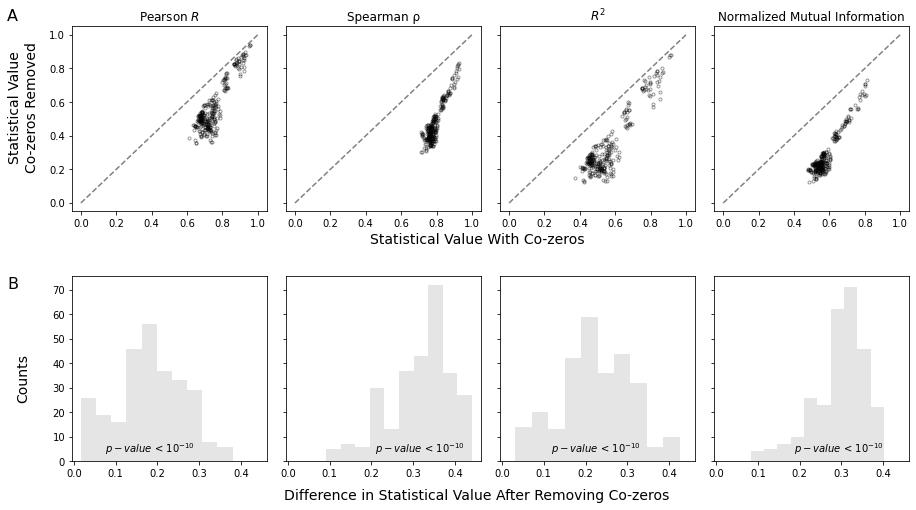

In [15]:
## Call a figure, and set the face color
fig,ax = plt.subplots(2,4,figsize=(15,8),sharex='row',sharey='row')
fig.set_facecolor('w')

## Set map coordinates
map_coor1 = [(0,3),(0,0),(0,2),(0,1)]
map_coor2 = [(1,3),(1,0),(1,2),(1,1)]

## Iterate thrut he comapred_paths
for i,(a,b) in enumerate(compared_paths):
    
    plt.sca(ax[map_coor1[i]])
    
    plt.plot([0,1],[0,1],linestyle='--',color='grey')

    A = undermask(pd.read_csv(a,index_col=0))
    B = undermask(pd.read_csv(b,index_col=0))
    
    ## plot the A and B
    plt.plot(A,B,'k.',alpha=0.4,fillstyle='none');
    
    plt.title(stat_labels[i])
    
    ## Set second set of axis 
    plt.sca(ax[map_coor2[i]])
    
    ## calc pvalue 
    wtest,wpval = ss.wilcoxon(A,B)
    
    print(a.split('_')[1])
    print(wpval)
    
    ## calc diff
    diff = A - B
    
    print(np.mean(diff),'\n\n')
    
    plt.hist(diff,color='grey',alpha=0.2)
    
    ## Annotate the p-value
    plt.text(x=np.mean(diff),y=5,s='$p-value$ < 10$^{-10}$' if wpval < 0.01 else None,va='center',ha='center')
    
## Addjust wspace
plt.subplots_adjust(hspace=0.35,wspace=0.1)

## Add x and y lables
fig.text(x=0.5,y=0.51,s='Statistical Value With Co-zeros',fontsize=14,va='center',ha='center')
fig.text(x=0.08,y=0.74,s='Statistical Value\nCo-zeros Removed',fontsize=14,va='center',ha='center',rotation=90)

## Add x and y lables
fig.text(x=0.5,y=0.065,s='Difference in Statistical Value After Removing Co-zeros',fontsize=14,va='center',ha='center')
fig.text(x=0.08,y=0.27,s='Counts',fontsize=14,va='center',ha='center',rotation=90)

## Add A and B label
fig.text(x=0.065,y=0.89,s='A',fontsize=16)
fig.text(x=0.065,y=0.425,s='B',fontsize=16)

## Set the save path
savepath = '../FIGURES/Bi-variate_diff_co_zeros_removed.png'

## save out
plt.savefig(savepath,dpi=600,bbox_inches='tight');

In [6]:
## Initilize pair diffs
pair_difs = []

## Iterate thru the compared paths
for (a,b) in compared_paths:
    
    ## Read in dataframes
    A = pd.read_csv(a,index_col=0)
    B = pd.read_csv(b,index_col=0)
    
    ## Calc the pair wise diff
    pair_difs.append(A-B)

## Calc the map min and max
diff_min = np.min([undermask(df).min() for df in pair_difs])
diff_max = np.max([undermask(df).max() for df in pair_difs])

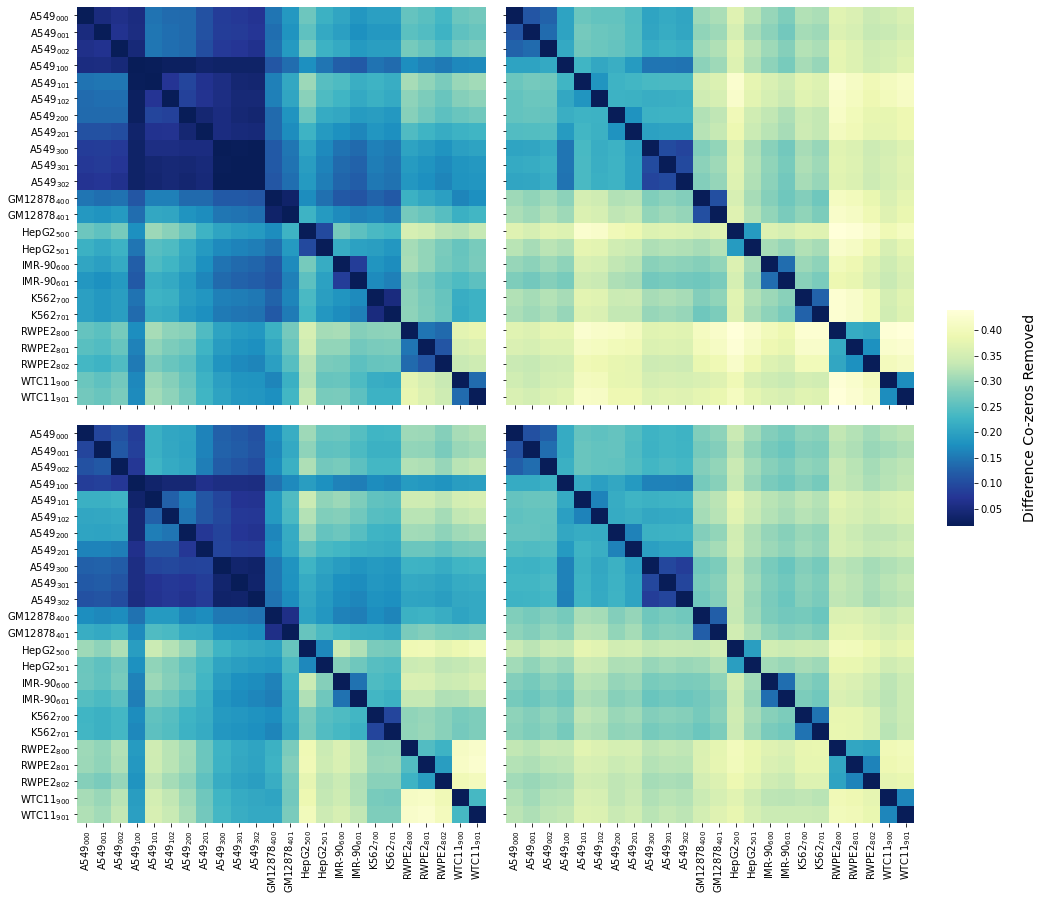

In [7]:
## Call a figure, and set the face color
fig,ax = plt.subplots(2,2,figsize=(15,15),sharex=True,sharey=True)
fig.set_facecolor('w')

## Set map color
mycmap = "YlGnBu_r"

## Set map coordinates
map_coor1 = [(1,1),(0,0),(1,0),(0,1)]

## Call color ax
cax = fig.add_axes([0.93,0.4,0.025,0.2])

## Iterate thru the paired dfs
for i,df in enumerate(pair_difs):
    plt.sca(ax[map_coor1[i]])
    
    sns.heatmap(df, cbar=True, cmap=mycmap, vmax=diff_max, vmin=diff_min, cbar_ax=cax)
    
## Set the cax
plt.sca(cax)

## add a ylable
plt.ylabel('\nDifference Co-zeros Removed',fontsize=14);

## Addjust subplots
plt.subplots_adjust(hspace=0.05,wspace=0.05)

## Set the save path
savepath = None #'../FIGURES/Heatmap_diff_co_zeros_removed.png'

## save out figure if save path is not none
if savepath:
    plt.savefig(savepath,dpi=300,bbox_inches='tight')